In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv("../saved/5m_journal_conf_comp_sci_with_rank_features.csv")
# df = pd.read_csv("../saved/5m_journal_conf_comp_sci_last_20.csv")
# df = pd.read_csv("../saved/250k_journal_conf_last20.csv")

In [34]:
df.columns.tolist()

['PaperId',
 'Abstract',
 'Author_1',
 'Author_10',
 'Author_11',
 'Author_2',
 'Author_3',
 'Author_4',
 'Author_5',
 'Author_6',
 'Author_7',
 'Author_8',
 'Author_9',
 'CitationCount',
 'CitationCountPerYear',
 'FieldOfStudy_0',
 'FieldOfStudy_1',
 'FieldOfStudy_2',
 'FieldOfStudy_3',
 'FieldOfStudy_4',
 'FieldOfStudy_5',
 'FirstPage',
 'JournalName',
 'LastPage',
 'PaperId.1',
 'PublishedDate',
 'Publisher',
 'Rank',
 'Title',
 'YearsSincePublication',
 'AuthorProminence',
 'MagBin',
 'CitationBin',
 'AuthorRank',
 'JournalNameRank',
 'PublisherRank']

In [35]:
df_cs = df.loc[df["FieldOfStudy_0"] == "computer science"]
cc = df_cs["CitationCount"].values
cc.shape

(282456,)

In [36]:
print(f"Max number of citations: {np.max(cc)}")
print(f"Median number of citations: {np.median(cc)}")
print(f"Mean number of citations: {np.mean(cc)}")
print(f"Std number of citations: {np.std(cc)}")

print(f"Number of papers with 0 citations: {np.sum((cc == 0))}")
print(f"Number papers with over 50 citations: {np.sum(cc > 50)}")
print(f"Number papers with over 100 citations: {np.sum(cc > 100)}")
print(f"Number papers with over 1k citations: {np.sum(cc > 1000)}")
print(f"Number papers with over 10k citations: {np.sum(cc > 10000)}")


Max number of citations: 49785
Median number of citations: 3.0
Mean number of citations: 24.544201574758546
Std number of citations: 223.54828234090309
Number of papers with 0 citations: 64673
Number papers with over 50 citations: 27584
Number papers with over 100 citations: 13273
Number papers with over 1k citations: 611
Number papers with over 10k citations: 17


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

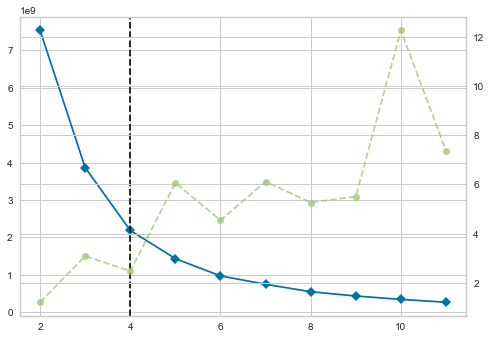

In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(cc.reshape(-1, 1))

In [38]:
clstr = KMeans(n_clusters=4, random_state=0)
clstr.fit(cc.reshape(-1,1))
clstr.cluster_centers_

array([[1.87208617e+01],
       [4.59303333e+04],
       [1.06772903e+04],
       [1.79619335e+03]])

In [39]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4, random_state=0)
gmm.fit(cc.reshape(-1,1))
gmm.means_

array([[ 10.85290406],
       [829.92259047],
       [  1.34139704],
       [ 93.43209027]])

In [40]:
gmm.predict([[3]])
gmm.covariances_

array([[[4.90653967e+01]],

       [[3.28909497e+06]],

       [[2.14355462e+00]],

       [[3.70498279e+03]]])

In [41]:
df_cs.drop(labels=[
'PaperId',
'Author_1',
'Author_10',
'Author_11',
'Author_2',
'Author_3',
'Author_4',
'Author_5',
'Author_6',
'Author_7',
'Author_8',
'Author_9',
'FieldOfStudy_0',
'FieldOfStudy_1',
'FieldOfStudy_2',
'FieldOfStudy_3',
'FieldOfStudy_4',
'FieldOfStudy_5',
'FirstPage',
'JournalName',
'LastPage',
'PaperId.1',
'PublishedDate',
'Publisher'
], inplace=True, axis=1)

In [42]:
print(df_cs.shape)
df_cs.head()

(282456, 12)


,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank
0,There are many application areas for wireless ...,3,0.346081,20673,Voice over ZigBee wireless sensor network appl...,8.668493,0,low,below-average,16.0,1.0,627.0
1,Two important automation characteristics are c...,2,0.352827,22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0
2,The Japan Meteorological Agency (JMA) has deve...,2,0.201657,20399,An Advanced System for Monitoring Geomagnetic ...,9.917808,0,low,below-average,1.0,449.0,358.0
3,Abstract A technique is presented for solvin...,1,0.031072,23916,Solving linear equation systems on vector comp...,32.183562,0,high,low,11.0,1.0,609.0
4,Many Internet of Things (IoT) technologies h...,26,5.200000,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation(df, columns=None, plot=True):
    t = df.loc[:, columns] if columns else df
    if not plot:
        print(t.corr())
    else:
        fig = plt.figure()
        mask = np.triu(t.corr())
        sns.heatmap(
            t.corr(),
            mask=mask,
            cbar=False,
            square=True,
            annot=True,
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm_r",
            linecolor="black",
        )
        plt.show()

In [44]:
def custom_binning(x, set=None):
    thresholds = [4, 10, 100, 1000]
    if set:
        thresholds = set.copy()
        thresholds.sort()
    if x <= thresholds[0]: 
        return 1
    elif x <= thresholds[1]:
        return 2
    elif x <= thresholds[2]:
        return 3
    else:
        return 4


In [47]:
threshold = [mu + np.sqrt(var).round() for mu, var in zip(gmm.means_, gmm.covariances_)]
print(threshold)
df_cs["BinnedCitations"] = pd.Series([custom_binning(x, set=threshold) for x in cc], index=df_cs.index)
# df_cs["BinnedCitations"] = pd.Series(gmm.predict(cc.reshape(-1,1)).reshape(-1,), index=df_cs.index)
df_cs.head()

[array([[17.85290406]]), array([[2643.92259047]]), array([[2.34139704]]), array([[154.43209027]])]


,Abstract,CitationCount,CitationCountPerYear,Rank,Title,YearsSincePublication,AuthorProminence,MagBin,CitationBin,AuthorRank,JournalNameRank,PublisherRank,BinnedCitations
0,There are many application areas for wireless ...,3,0.346081,20673,Voice over ZigBee wireless sensor network appl...,8.668493,0,low,below-average,16.0,1.0,627.0,2
1,Two important automation characteristics are c...,2,0.352827,22262,Crossing the boundaries of automation-Function...,5.668493,0,above-average,below-average,1.0,980.0,596.0,1
2,The Japan Meteorological Agency (JMA) has deve...,2,0.201657,20399,An Advanced System for Monitoring Geomagnetic ...,9.917808,0,low,below-average,1.0,449.0,358.0,1
3,Abstract A technique is presented for solvin...,1,0.031072,23916,Solving linear equation systems on vector comp...,32.183562,0,high,low,11.0,1.0,609.0,1
4,Many Internet of Things (IoT) technologies h...,26,5.200000,18697,EasyConnect: A Management System for IoT Devic...,5.000000,1,low,high,1372.0,502.0,627.0,3


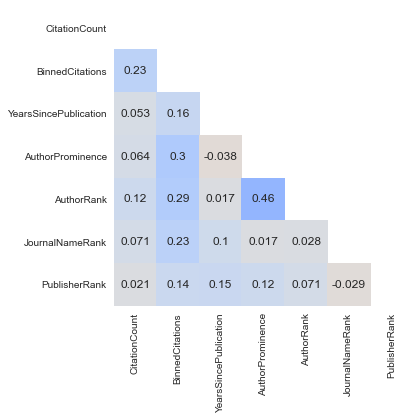

In [48]:
correlation(df_cs, columns=[
    "CitationCount",
    "BinnedCitations",
    "YearsSincePublication",
    "AuthorProminence",
    "AuthorRank",
    "JournalNameRank",
    "PublisherRank"
])

In [113]:
from sklearn.neural_network import MLPClassifier
features = [ 
    "YearsSincePublication",
    "AuthorRank",
    "JournalNameRank",
    "PublisherRank"
    ]
X = df_cs.loc[:, features].values
y = df_cs.loc[:, "BinnedCitations"].values

print(X.shape, y.shape)

(282456, 4) (282456,)


[124900, 108393, 41432, 7731]


([<matplotlib.axis.XTick at 0x7f8a418eb8d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

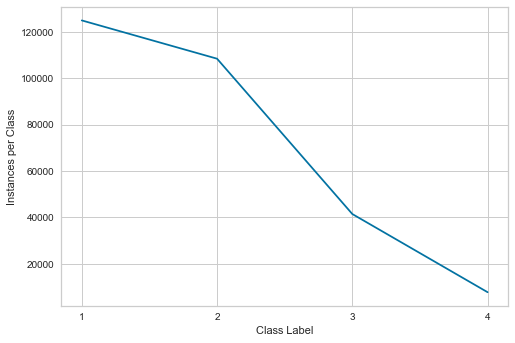

In [116]:
x = [np.sum(df_cs.loc[:, "BinnedCitations"].values == c) for c in range(1,5)]
print(x)
fig = plt.figure()
plt.plot(list(range(1,5)), x)
plt.ylabel("Instances per Class")
plt.xlabel("Class Label")
plt.xticks([1,2,3,4])

In [117]:
from sklearn.model_selection import train_test_split
X_, X_test, y_, y_test = train_test_split(X, y)
X_train, X_dev, y_train, y_dev = train_test_split(X_, y_)

X_train_mini, y_train_mini = X_train[:1000], y[:1000]

MLPClassifier(hidden_layer_sizes=(10, 3), max_iter=1000)

In [120]:
def make_uniform(labels, max_cnt):
    selection= np.zeros_like(labels, dtype=bool)
    for c in range(1, 5):
        cnt = 0
        for i, y in enumerate(labels):
            if cnt == split: break
            bool_val = y == c
            if bool_val:
                cnt += int(bool_val)
                selection[i] = bool_val
    return selection

In [121]:
from sklearn.metrics import classification_report
split = np.sum(y_train==4)
selection = make_uniform(y_train, split)
y_train_uniform = y_train[selection]
X_train_uniform = X_train[selection]
print(classification_report(y_train_uniform, y_train_uniform))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4280
           2       1.00      1.00      1.00      4280
           3       1.00      1.00      1.00      4280
           4       1.00      1.00      1.00      4280

    accuracy                           1.00     17120
   macro avg       1.00      1.00      1.00     17120
weighted avg       1.00      1.00      1.00     17120



In [122]:
split = np.sum(y_dev==4)
selection = make_uniform(y_dev, split)
y_dev_uniform = y_dev[selection]
X_dev_uniform = X_dev[selection]
print(classification_report(y_dev_uniform, y_dev_uniform))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1500
           2       1.00      1.00      1.00      1500
           3       1.00      1.00      1.00      1500
           4       1.00      1.00      1.00      1500

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [127]:
nn = MLPClassifier(hidden_layer_sizes=(5, 4, 16, 8, 4), max_iter=50, alpha=1.0, learning_rate='adaptive')
nn.fit(X_train_uniform, y_train_uniform)
print(nn._no_improvement_count)
print(nn.score(X_train_uniform, y_train_uniform))
print(nn.score(X_dev_uniform, y_dev_uniform))


1
0.3981308411214953
0.4038333333333333


In [134]:
from sklearn.metrics import confusion_matrix
y_true = y_dev_uniform
X_true = X_dev_uniform
y_pred = nn.predict(X_true)
print(confusion_matrix(y_true, y_pred, labels=[1, 2, 3, 4]))
print(classification_report(y_true, y_pred))

[[ 839  162   54  445]
 [ 584  208   97  611]
 [ 233  169   94 1004]
 [  78   86   54 1282]]
              precision    recall  f1-score   support

           1       0.48      0.56      0.52      1500
           2       0.33      0.14      0.20      1500
           3       0.31      0.06      0.10      1500
           4       0.38      0.85      0.53      1500

    accuracy                           0.40      6000
   macro avg       0.38      0.40      0.34      6000
weighted avg       0.38      0.40      0.34      6000

